# PyPho: Minimal Example

[PyPho](https://github.com/GeoISTO/PyPho) is a python package for investigating **photogrammetric design**.  
This is a minimal example to showcase what can be done with [PyPho](https://github.com/GeoISTO/PyPho).  

Here you are in a Jupyter Notebook, where Pypho best works, but it can also be used in other python environments.  
If you are not familiar with Jupyter notebooks, see [Try Jupyter](https://try.jupyter.org/).  
If you are in a rush, just press ```Shift + Enter``` to run the cells and go to the next.

In this minimal example, you'll learn to:
1. Load pypho package
1. Tell the rendering to execute on the server side to allow updates to work automatically.
1. Create a basic scene to test pypho
1. Move the camera
1. Change the camera aperture
1. Change the property shown on the object.

Some key elements you might want to further investigate with PyPho:
1. load or add you camera setting in/from the registry (see [02_camera_definition.ipynb](./02_camera_definition.ipynb) about how to add new camera definitions)
2. add an object (see [03_target_objects.ipynb](./03_target_objects.ipynb) for more objects)
3. point the camera at the object and take a picture (see [04_camera_manipulation.ipynb](./04_camera_manipulation.ipynb) for more camera manipulations)

In [1]:
# this is to make pypho available from the local install
import sys
sys.path.append("..")

import pypho
print("Using PyPho version:", pypho.__version__)
from pypho import camera, target, graphics

Using PyPho version: 0.0.4


In [ ]:
# by default using the client side rendering is faster on binder 
# but it won't update automatically on pypho's update
# use "trame" backend if automated update is needed
import pyvista as pv
pv.set_jupyter_backend('trame') # here updates are needed 

## Creating the default scene

**Pypho** provides 3 main entities used to investigate photogrammetry settings.  
 * `Camera`: is the main object to emulate a photographic camera
 * `TargetObject`: represents the different possible physical object that can be taken in pictures
 * `Viewer3D`: provides a 3D view to see Camera and observed objects

In the next cell, `pypho.graphics.get_default_scene()` generates a default scene.  
It returns an object, a camera, and a viewer, which is automatically rendered.

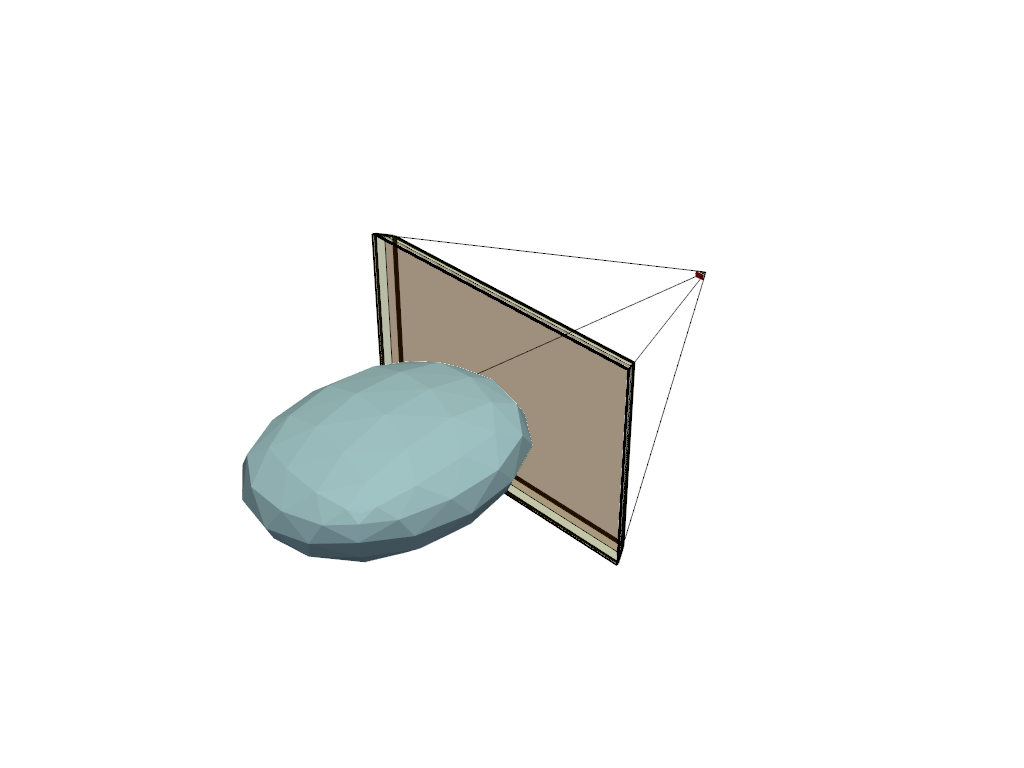

In [3]:
obj, cam, viewer = pypho.graphics.get_default_scene()

## Moving the camera around

In [4]:
# move the camera around or change its parameters
cam.orbit(-30, obj.center)

# when viewer.update() is called, the existing viewer will show the changes 
viewer.update()

In [5]:
# change aperture to see the field depth evolve
cam.update_aperture(11)
cam.focus_on()

True

See [04_camera_manipulation.ipynb](./04_camera_manipulation.ipynb) for more examples on how to manipulate cameras.

### Show properties

In [6]:
#to show a property
viewer.set_active_scalars("resolution")

In [7]:
# to list the properties use either obj.point_data.keys() or obj.point_data
fields = obj.point_data.keys()
for c in [fields[i::4] for i in range(4)]:
    print("".join([f"{c_i:<24}" for c_i in c]))

TCoords                 x_all                   z_all                   angle_height_all        pix_j_all               in_view_b               sampling_distance_all   diffraction_diameter_alldepth_error_std_all     visible_sharp_b         
Normals                 x                       z                       angle_height            pix_j                   in_view                 sampling_distance       diffraction_diameter    depth_error_std         visible_sharp           
visible_b               y_all                   angle_width_all         pix_i_all               facing_b                resolution_all          defocus_diameter_all    blur_spot_diameter_all  sharp_b                 nb_views                
visible                 y                       angle_width             pix_i                   facing                  resolution              defocus_diameter        blur_spot_diameter      sharp                   
